# Nhóm thực hiện - Nhóm 5
- Phạm Minh Khiêm
- Trần Thị Uyên
- Ngô Văn Giang
- Nguyễn Văn Chức

<!-- Following are Spark’s core data
sources: -->
Các nguồn dưới đây là các nguồn data chính của Spark:
1. CSV
2. JSON
3. Parquet
4. ORC
5. JDBC/ODBC connections
6. Plain-text files

<!-- As mentioned, Spark has numerous community-created data sources. Here’s just a small sample: -->
Spark cũng có rất nhiều các nguồn data tạo bởi cộng đồng. Các ví dụ sau chỉ là một vài ví dụ nhỏ
1. Cassandra
2. HBase
3. MongoDB
4. AWS Redshift
5. XML

<!-- And many, many others -->
Ngoài ra cò rất nhiều các nguồn khác nữa.

<!-- # The Structure of the Data Sources API -->
# Cấu trúc API cho nguồn data
Before proceeding with how to read and write from certain formats, let’s visit the overall
organizational structure of the data source APIs.
<!-- ## Read API Structure -->
## Cấu trúc API cho việc đọc
<!-- The core structure for reading data is as follows: -->
Cấu trúc cốt lõi cho việc đọc data như sau:

DataFrameReader.format(...).option("key", "value").schema(...).load()

<!-- We will use this format to read from all of our data sources. format is optional because by
default Spark will use the Parquet format. option allows you to set key-value configurations to
parameterize how you will read data. Lastly, schema is optional if the data source provides a
schema or if you intend to use schema inference. Naturally, there are some required options for
each format, which we will discuss when we look at each format. -->
Chúng ta sẽ sử dụng định dạng này để đọc từ tất cả các nguồn dữ liệu. ".format" là tùy chọn vì theo mặc định Spark sẽ sử dụng định dạng Parquet.  Format cho phép bạn thiết lập các cấu hình key-value để tham số hóa cách bạn sẽ đọc dữ liệu.  Cuối cùng, schema là tùy chọn nếu nguồn dữ liệu cung cấp một scheme hoặc nếu bạn định suy diễn giá trị schema.  Đương nhiên, có một số tùy chọn bắt buộc cho mỗi format, chúng ta sẽ thảo luận khi xem xét từng định dạng.

<!-- ## Basics of Reading Data -->
## Đọc dữ liệu cơ bản
<!-- The foundation for reading data in Spark is the DataFrameReader. We access this through the
SparkSession via the read attribute: -->
Nền tảng để đọc dữ liệu trong Spark là DataFrameReader. Chúng ta truy cập thông qua SparkSession nhờ thuộc tính read:

spark.read

<!-- After we have a DataFrame reader, we specify several values: -->
Sau khi có DataFrame reader, chúng ta chỉ định một số giá trị:
1. The format
2. The schema
3. The read mode
4. A series of options

<!-- The format, options, and schema each return a DataFrameReader that can undergo further
transformations and are all optional, except for one option. Each data source has a specific set of
options that determine how the data is read into Spark (we cover these options shortly). At a
minimum, you must supply the DataFrameReader a path to from which to read.
 -->
 Mỗi format, option và schema trả về một DataFrameReader, kết quả trả về nầy có thể trải qua các biến đổi khác nữa và tất cả đều là tùy chọn, ngoại trừ một option. Mỗi nguồn data có một tập hợp các option cụ thể xác định cách dữ liệu được đọc vào Spark (trong những phần tới). Tối thiểu, bạn phải cung cấp cho DataFrameReader một đường dẫn để đọc từ đó.
<!-- Here’s an example of the overall layout: -->
Đây là một ví dụ về bố cục tổng thể:

In [ ]:
#spark.read.format("csv")
#.option("mode", "FAILFAST")
#.option("inferSchema", "true")
#.option("path", "path/to/file(s)")
#.schema(someSchema)
#.load()

### Các chế độ đọc
<!-- Reading data from an external source naturally entails encountering malformed data, especially
when working with only semi-structured data sources. Read modes specify what will happen
when Spark does come across malformed records. Table 9-1 lists the read modes. -->
Việc đọc dữ liệu từ một nguồn bên ngoài đương nhiên dẫn đến việc gặp phải dữ liệu không đúng định dạng, đặc biệt khi chỉ làm việc với các nguồn dữ liệu bán cấu trúc.  Chế độ đọc chỉ định điều gì sẽ xảy ra khi Spark gặp phải các bản ghi không đúng định dạng.  Bảng 9-1 liệt kê các chế độ đọc.
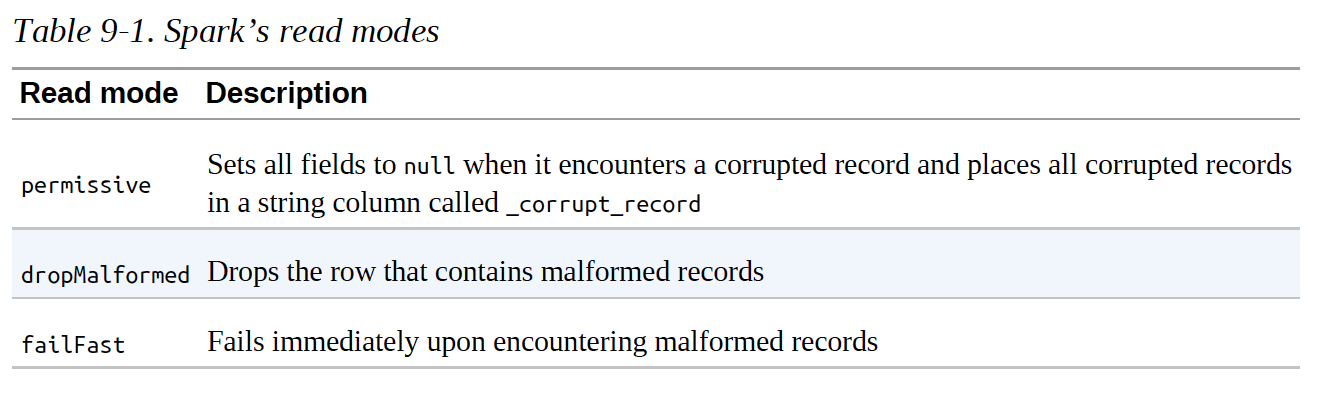
<!-- The default is permissive. -->
Mặc định là cho phép.

## Cấu trúc API Ghi
<!-- The core structure for writing data is as follows: -->
Cấu trúc trọng tâm cho việc ghi data cho bởi:

DataFrameWriter.format(...).option(...).partitionBy(...).bucketBy(...).sortBy(
...).save()

### Các chế độ lưu
<!-- Save modes specify what will happen if Spark finds data at the specified location (assuming all
else equal). Table 9-2 lists the save modes. -->
Chế độ lưu chỉ định điều gì sẽ xảy ra nếu Spark tìm thấy dữ liệu tại vị trí đã chỉ định (giả sử tất cả các dữ liệu khác đều bằng nhau).  Bảng 9-2 liệt kê các chế độ lưu.
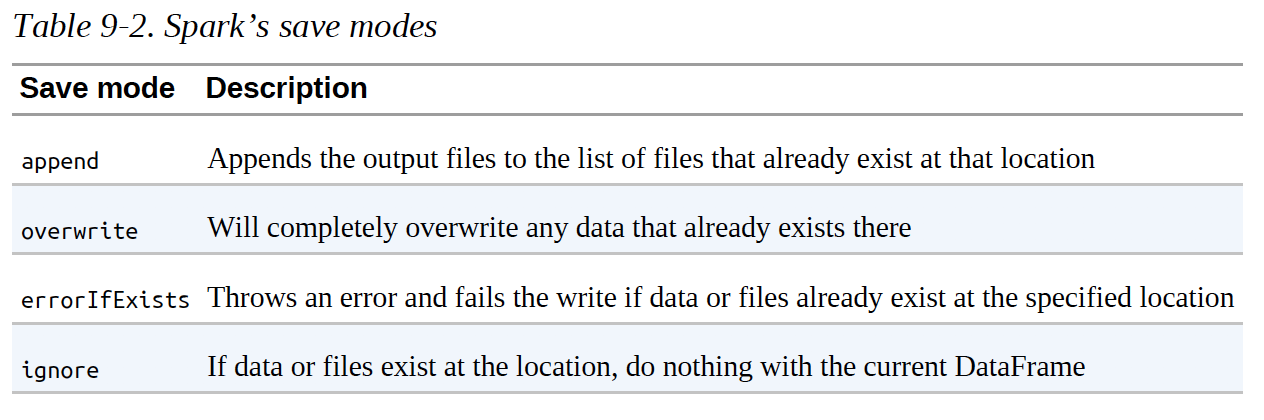
<!-- The default is errorIfExists. This means that if Spark finds data at the location to which
you’re writing, it will fail the write immediately. -->
Mặc định là errorIfExists.  Điều này có nghĩa là nếu Spark tìm thấy dữ liệu ở vị trí mà bạn đang viết, nó sẽ không viết được ngay lập tức.

# CSV Files
<!-- CSV stands for commma-separated values. -->
CSV là viết tắt của "commma-separated values"

In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [13]:
csvFile = spark.read.format("csv")\
.option("header", "true")\
.option("mode", "FAILFAST")\
.option("inferSchema", "true")\
.load("../data/flight-data/csv/2010-summary.csv")

Ghi CSV Files

In [ ]:
csvFile.write.format("csv").mode("overwrite").option("sep", "\t")\
.save("/tmp/my-tsv-file.tsv")

<!-- When you list the destination directory, you can see that my-tsv-file is actually a folder with
numerous files within it: -->
Khi bạn liệt kê thư mục đích, bạn có thể thấy rằng my-tsv-file thực ra là một thư mục có nhiều tệp bên trong nó:

In [ ]:
!ls /tmp/my-tsv-file.tsv/

<!-- This actually reflects the number of partitions in our DataFrame at the time we write it out. If we
were to repartition our data before then, we would end up with a different number of files. We
discuss this trade-off at the end of this chapter. -->
Điều này thực sự phản ánh số lượng partitions trong DataFrame của chúng ta tại thời điểm viết nó ra.  Nếu chúng ta phân vùng lại dữ liệu của mình trước đó, chúng ta sẽ có một số lượng tệp khác nhau.  Chúng ta sẽ thảo luận về sự đánh đổi này ở cuối chương này.

# JSON Files
## Reading JSON Files

In [ ]:
spark.read.format("json").option("mode", "FAILFAST")\
.option("inferSchema", "true")\
.load("../data/flight-data/json/2010-summary.json").show(5)

## Ghi JSON Files
<!-- Writing JSON files is just as simple as reading them, and, as you might expect, the data source
does not matter. Therefore, we can reuse the CSV DataFrame that we created earlier to be the
source for our JSON file. This, too, follows the rules that we specified before: one file per
partition will be written out, and the entire DataFrame will be written out as a folder. It will also
have one JSON object per line: -->
Việc ghi các tệp JSON cũng đơn giản như đọc chúng và như bạn có thể mong đợi, nguồn dữ liệu không quan trọng.  Do đó, chúng ta có thể sử dụng lại CSV DataFrame đã tạo trước đó để làm nguồn cho tệp JSON này.  Điều này cũng tuân theo các quy tắc mà chúng ta đã đặt ra trước đó: một tệp trên mỗi phân vùng sẽ được ghi ra ngoài và toàn bộ DataFrame sẽ được viết ra dưới dạng một thư mục.  Nó cũng sẽ có một đối tượng JSON trên mỗi dòng:

In [ ]:
csvFile.write.format("json").mode("overwrite").save("/tmp/my-json-file.json")
!ls /tmp/my-json-file.json/

# Parquet Files
<!-- It is a file
format that works exceptionally well with Apache Spark and is in fact the default file format. We
recommend writing data out to Parquet for long-term storage because reading from a Parquet file
will always be more efficient than JSON or CSV. Another advantage of Parquet is that it
supports complex types. This means that if your column is an array (which would fail with a
CSV file, for example), map, or struct, you’ll still be able to read and write that file without
issue. Here’s how to specify Parquet as the read format: -->
Đây là một định dạng tệp hoạt động đặc biệt tốt với Apache Spark và trên thực tế là định dạng tệp mặc định.  Chúng tôi khuyên bạn nên ghi dữ liệu ra Parquet để lưu trữ lâu dài vì việc đọc từ tệp Parquet sẽ luôn hiệu quả hơn JSON hoặc CSV.  Một ưu điểm khác của Parquet là nó hỗ trợ các loại dữ liệu phức tạp.  Điều này có nghĩa là nếu cột của bạn là một mảng (ví dụ: sẽ không thành công với tệp CSV), bản đồ hoặc cấu trúc, thì bạn vẫn có thể đọc và ghi tệp đó mà không gặp vấn đề gì.  Dưới đây là cách chỉ định Parquet làm định dạng đọc:

In [ ]:
spark.read.format("parquet")

## Đọc Parquet Files
<!-- Parquet has very few options because it enforces its own schema when storing data. Thus, all you
need to set is the format and you are good to go. We can set the schema if we have strict
requirements for what our DataFrame should look like. Oftentimes this is not necessary because
we can use schema on read, which is similar to the inferSchema with CSV files. However, with
Parquet files, this method is more powerful because the schema is built into the file itself (so no
inference needed). -->
Parquet có rất ít tùy chọn vì nó thực thi schema riêng khi lưu trữ dữ liệu.  Vì vậy, tất cả những gì bạn cần đặt là định dạng mà thôi.  Chúng ta có thể đặt scheme nếu có các yêu cầu nghiêm ngặt về DataFrame.  Thông thường, điều này là không cần thiết vì chúng ta có thể sử dụng schema khi đọc, tương tự như inferSchema với tệp CSV.  Tuy nhiên, với các tệp Parquet, phương pháp này mạnh hơn vì scheme đã được tích hợp sẵn trong chính tệp (vì vậy không cần suy diễn).

In [ ]:
spark.read.format("parquet")\
.load("../data/flight-data/parquet/2010-summary.parquet").show(5)

## Parquet options
<!-- As we just mentioned, there are very few Parquet options—precisely two, in fact—because it has
a well-defined specification that aligns closely with the concepts in Spark. Table 9-5 presents the
options. -->
Như chúng ta vừa đề cập, có rất ít tùy chọn Parquet — chính xác là hai, trên thực tế — bởi vì nó có đặc điểm kỹ thuật được xác định rõ ràng phù hợp chặt chẽ với các khái niệm trong Spark.  Bảng 9-5 trình bày các tùy chọn.
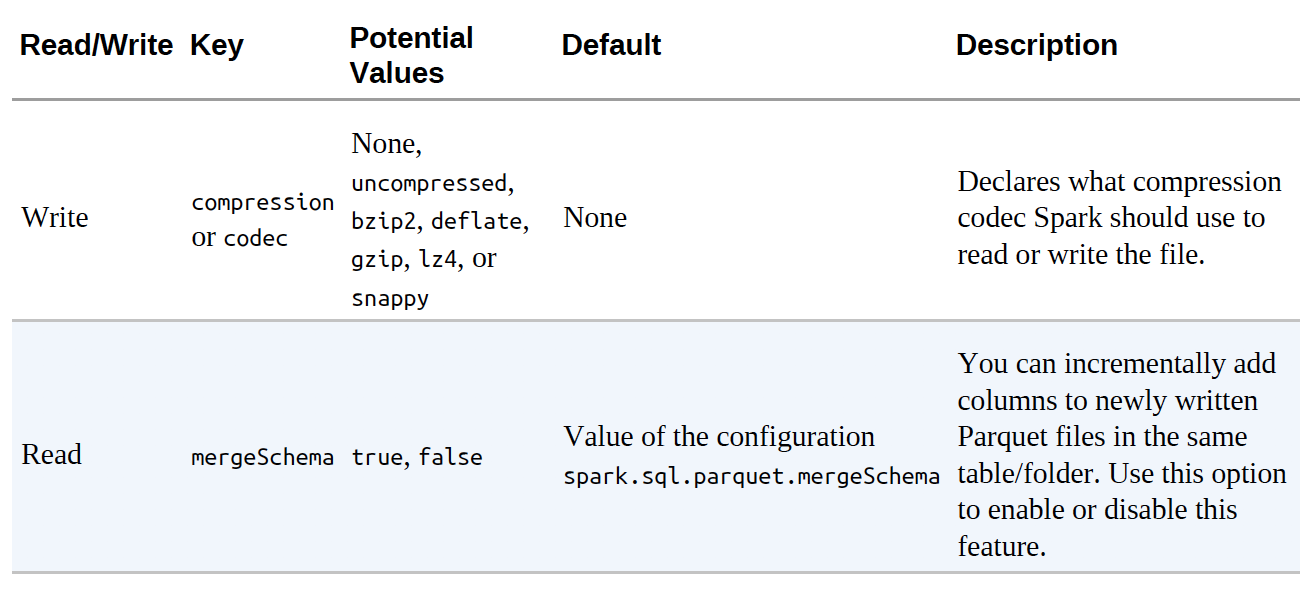
## Ghi Parquet Files

In [ ]:
csvFile.write.format("parquet").mode("overwrite")\
.save("/tmp/my-parquet-file.parquet")

# ORC Files
<!-- ORC is a self-describing, type-aware columnar file format designed for Hadoop workloads. It is
optimized for large streaming reads, but with integrated support for finding required rows
quickly. ORC actually has no options for reading in data because Spark understands the file
format quite well. An often-asked question is: What is the difference between ORC and Parquet?
For the most part, they’re quite similar; the fundamental difference is that Parquet is further
optimized for use with Spark, whereas ORC is further optimized for Hive. -->
ORC là một định dạng tệp cột tự mô tả, nhận biết kiểu được thiết kế cho khối lượng công việc Hadoop.  Nó được tối ưu hóa để đọc trực tuyến lớn, nhưng với hỗ trợ tích hợp để tìm các hàng cần thiết một cách nhanh chóng.  ORC thực sự không có tùy chọn để đọc dữ liệu vì Spark hiểu khá rõ định dạng tệp.  Một câu hỏi thường được đặt ra là: Sự khác biệt giữa ORC và Parquet là gì?  Đối với hầu hết các phần, chúng khá giống nhau;  sự khác biệt cơ bản là Parquet được tối ưu hóa hơn nữa để sử dụng với Spark, trong khi ORC được tối ưu hóa hơn nữa cho Hive.
## Đọc Orc Files

In [ ]:
spark.read.format("orc").load("../data/flight-data/orc/2010-summary.orc").show(5)

## Ghi Orc Files

In [ ]:
csvFile.write.format("orc").mode("overwrite").save("/tmp/my-json-file.orc")

# SQL Databases
## Đọc từ SQL Databases
<!-- When it comes to reading a file, SQL databases are no different from the other data sources that
we looked at earlier. As with those sources, we specify the format and options, and then load in
the data: -->
Khi nói đến việc đọc một tệp, cơ sở dữ liệu SQL không khác gì các nguồn dữ liệu khác mà chúng ta đã xem trước đó.  Như với các nguồn đó, chúng ta chỉ định format và option, sau đó tải dữ liệu vào:

In [2]:
driver = "org.sqlite.JDBC"
path = "../data/flight-data/jdbc/my-sqlite.db"
url = "jdbc:sqlite:" + path
tablename = "flight_info"

In [3]:
# copy jar to spark jars
# docker cp spark-lab/sqlite-jdbc-3.20.1.jar pyspark:/usr/local/spark-3.0.1-bin-hadoop3.2/jars/
dbDataFrame = spark.read.format("jdbc").option("url", url)\
.option("dbtable", tablename).option("driver", driver).load()

In [4]:
#pgDF = spark.read.format("jdbc")\
#.option("driver", "org.postgresql.Driver")\
#.option("url", "jdbc:postgresql://database_server")\
#.option("dbtable", "schema.tablename")\
#.option("user", "username").option("password", "my-secret-password").load()

# Text Files
<!-- Spark also allows you to read in plain-text files. Each line in the file becomes a record in the
DataFrame. -->
Spark cũng cho phép bạn đọc các tệp plain-text.  Mỗi dòng trong tệp sẽ trở thành một bản ghi trong DataFrame.
## Đọc Text Files
<!-- Reading text files is straightforward: you simply specify the type to be textFile. With
textFile, partitioned directory names are ignored. To read and write text files according to
partitions, you should use text, which respects partitioning on reading and writing: -->
Việc đọc các tệp txt rất đơn giản: bạn chỉ cần chỉ định kiểu là textFile.  Với textFile, tên thư mục được phân vùng bị bỏ qua.  Để đọc và ghi tệp văn bản theo phân vùng, bạn nên sử dụng text, tương ứng khi đọc và viết:

In [11]:
spark.read.text("../data/flight-data/csv/2010-summary.csv")\
.selectExpr("split(value, ',') as rows").show()

+--------------------+
|                rows|
+--------------------+
|[DEST_COUNTRY_NAM...|
|[United States, R...|
|[United States, I...|
|[United States, I...|
|[Egypt, United St...|
|[Equatorial Guine...|
|[United States, S...|
|[United States, G...|
|[Costa Rica, Unit...|
|[Senegal, United ...|
|[United States, M...|
|[Guyana, United S...|
|[United States, S...|
|[Malta, United St...|
|[Bolivia, United ...|
|[Anguilla, United...|
|[Turks and Caicos...|
|[United States, A...|
|[Saint Vincent an...|
|[Italy, United St...|
+--------------------+
only showing top 20 rows



## Ghi Text Files
<!-- When you write a text file, you need to be sure to have only one string column; otherwise, the
write will fail: -->
Khi ghi text file, bạn cần phải đảm bảo rằng chỉ có 1 cột string, nếu không, quá trình ghi sẽ lỗi

In [14]:
csvFile.select("DEST_COUNTRY_NAME").write.text("/tmp/simple-text-file.txt")

In [15]:
!ls -la /tmp/simple-text-file.txt

total 20
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:38 .
drwxrwxrwt 1 root   root  4096 Oct  2 14:38 ..
-rw-r--r-- 1 jovyan users 3124 Oct  2 14:38 part-00000-21414543-edaa-4914-beb9-4912e102c47c-c000.txt
-rw-r--r-- 1 jovyan users   36 Oct  2 14:38 .part-00000-21414543-edaa-4914-beb9-4912e102c47c-c000.txt.crc
-rw-r--r-- 1 jovyan users    0 Oct  2 14:38 _SUCCESS
-rw-r--r-- 1 jovyan users    8 Oct  2 14:38 ._SUCCESS.crc


<!-- If you perform some partitioning when performing your write (we’ll discuss partitioning in the
next couple of pages), you can write more columns. However, those columns will manifest as
directories in the folder to which you’re writing out to, instead of columns on every single file: -->
Nếu bạn thực hiện một số phân vùng khi thực hiện quá trình viết (chúng ta sẽ thảo luận về phân vùng trong phần tiếp theo), bạn có thể viết nhiều cột hơn.  Tuy nhiên, các cột đó sẽ hiển thị dưới dạng các thư mục trong thư mục mà bạn đang viết ra, thay vì các cột trên mỗi tệp đơn lẻ:

In [16]:
csvFile.limit(10).select("DEST_COUNTRY_NAME", "count")\
.write.partitionBy("count").text("/tmp/five-csv-files2py.csv")

In [18]:
csvFile.show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
+-----------------+-------------------+-----+
only showing top 2 rows



<!-- # Advanced I/O Concepts -->
# Khái niêm I/O nâng cao
## Đọc  dữ liệu song song
<!-- Multiple executors cannot read from the same file at the same time necessarily, but they can read
different files at the same time. In general, this means that when you read from a folder with
multiple files in it, each one of those files will become a partition in your DataFrame and be read
in by available executors in parallel (with the remaining queueing up behind the others). -->
Nhiều người thực thi không thể nhất thiết phải đọc từ cùng một tệp một lúc, nhưng họ có thể đọc các tệp khác nhau cùng một lúc.  Nói chung, điều này có nghĩa là khi bạn đọc từ một thư mục có nhiều tệp trong đó, mỗi tệp trong số đó sẽ trở thành một phân vùng trong DataFrame của bạn và được đọc song song bởi những executor có sẵn (với phần còn lại xếp hàng sau những tệp khác).
## Ghi dữ liệu song song
<!-- The number of files or data written is dependent on the number of partitions the DataFrame has
at the time you write out the data. By default, one file is written per partition of the data. This
means that although we specify a “file,” it’s actually a number of files within a folder, with the
name of the specified file, with one file per each partition that is written.
For example, the following code -->
Số lượng tệp hoặc dữ liệu được ghi phụ thuộc vào số lượng phân vùng mà DataFrame có tại thời điểm bạn ghi dữ liệu.  Theo mặc định, một tệp được ghi trên mỗi phân vùng dữ liệu.  Điều này có nghĩa là mặc dù chúng tôi chỉ định một “tệp”, đó thực sự là một số tệp trong một thư mục, với tên của tệp được chỉ định, với một tệp trên mỗi phân vùng được ghi.  Ví dụ, đoạn mã sau:

In [19]:
csvFile.repartition(5).write.format("csv").save("/tmp/multiple.csv")

<!-- will end up with five files inside of that folder. As you can see from the list call: -->
sẽ kết thúc với năm tệp bên trong thư mục đó.  Như bạn có thể thấy từ cuộc gọi danh sách:

In [20]:
!ls /tmp/multiple.csv

part-00000-71bf64e6-b498-4608-9eda-95a916f37bf8-c000.csv
part-00001-71bf64e6-b498-4608-9eda-95a916f37bf8-c000.csv
part-00002-71bf64e6-b498-4608-9eda-95a916f37bf8-c000.csv
part-00003-71bf64e6-b498-4608-9eda-95a916f37bf8-c000.csv
part-00004-71bf64e6-b498-4608-9eda-95a916f37bf8-c000.csv
_SUCCESS


## Phân vùng - Partitioning
<!-- Partitioning is a tool that allows you to control what data is stored (and where) as you write it.
When you write a file to a partitioned directory (or table), you basically encode a column as a
folder. What this allows you to do is skip lots of data when you go to read it in later, allowing
you to read in only the data relevant to your problem instead of having to scan the complete
dataset. These are supported for all file-based data sources: -->
Phân vùng là một công cụ cho phép bạn kiểm soát dữ liệu nào được lưu trữ (và lưu trữ ở đâu) khi bạn ghi dữ liệu đó.  Khi bạn ghi tệp vào một thư mục (hoặc bảng) được phân vùng, về cơ bản bạn mã hóa một cột dưới dạng một thư mục.  Điều này cho phép bạn làm là bỏ qua nhiều dữ liệu khi bạn đọc nó sau này, cho phép bạn chỉ đọc dữ liệu liên quan đến vấn đề của bạn thay vì phải quét toàn bộ tập dữ liệu.  Chúng được hỗ trợ cho tất cả các nguồn dữ liệu dựa trên tệp:

In [21]:
csvFile.limit(10).write.mode("overwrite").partitionBy("DEST_COUNTRY_NAME")\
.save("/tmp/partitioned-files.parquet")

<!-- Upon writing, you get a list of folders in your Parquet “file”: -->
Sau khi viết, bạn sẽ nhận được danh sách các thư mục trong “tệp” Parquet của mình:

In [23]:
!ls -la /tmp/partitioned-files.parquet

total 32
drwxr-xr-x 7 jovyan users 4096 Oct  2 14:44  .
drwxrwxrwt 1 root   root  4096 Oct  2 14:44  ..
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:44 'DEST_COUNTRY_NAME=Costa Rica'
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:44 'DEST_COUNTRY_NAME=Egypt'
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:44 'DEST_COUNTRY_NAME=Equatorial Guinea'
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:44 'DEST_COUNTRY_NAME=Senegal'
drwxr-xr-x 2 jovyan users 4096 Oct  2 14:44 'DEST_COUNTRY_NAME=United States'
-rw-r--r-- 1 jovyan users    0 Oct  2 14:44  _SUCCESS
-rw-r--r-- 1 jovyan users    8 Oct  2 14:44  ._SUCCESS.crc


<!-- Each of these will contain Parquet files that contain that data where the previous predicate was
true: -->
Mỗi tệp này sẽ chứa các tệp Parquet chứa dữ liệu mà vị từ trước đó là true:

In [24]:
!ls /tmp/partitioned-files.parquet/DEST_COUNTRY_NAME=Senegal/

part-00000-f26eaa0b-37c3-4d8d-97d8-8eb8e08ee1e6.c000.snappy.parquet


<!-- This is probably the lowest-hanging optimization that you can use when you have a table that
readers frequently filter by before manipulating. For instance, date is particularly common for a
partition because, downstream, often we want to look at only the previous week’s data (instead
of scanning the entire list of records). This can provide massive speedups for readers. -->
Đây có lẽ là cách tối ưu hóa việc hệ thống bị treo thấp nhất mà bạn có thể sử dụng khi có một bảng mà người đọc thường xuyên lọc trước khi thao tác.  Ví dụ: ngày đặc biệt phổ biến đối với một phân vùng bởi vì, ở phần cuối, chúng tôi thường chỉ muốn xem dữ liệu của tuần trước (thay vì quét toàn bộ danh sách bản ghi).  Điều này có thể cung cấp tốc độ lớn cho người đọc.

## Bucketing
<!-- Bucketing is another file organization approach with which you can control the data that is
specifically written to each file. This can help avoid shuffles later when you go to read the data
because data with the same bucket ID will all be grouped together into one physical partition.
This means that the data is prepartitioned according to how you expect to use that data later on,
meaning you can avoid expensive shuffles when joining or aggregating.
 -->
 Bucketing là một phương pháp tổ chức tệp khác mà bạn có thể kiểm soát dữ liệu được ghi cụ thể vào từng tệp.  Điều này có thể giúp tránh xáo trộn sau này khi bạn đọc dữ liệu vì dữ liệu có cùng ID nhóm sẽ được nhóm lại với nhau thành một phân vùng vật lý.  Điều này có nghĩa là dữ liệu được phân vùng trước theo cách bạn muốn sử dụng dữ liệu đó sau này, có nghĩa là bạn có thể tránh được những xáo trộn tốn kém khi kết hợp hoặc tổng hợp.
<!-- Rather than partitioning on a specific column (which might write out a ton of directories), it’s
probably worthwhile to explore bucketing the data instead. This will create a certain number of
files and organize our data into those “buckets”: -->
Thay vì phân vùng trên một cột cụ thể (có thể viết ra rất nhiều thư mục), thay vào đó, có lẽ đáng giá là khám phá cách phân chia dữ liệu.  Điều này sẽ tạo một số lượng tệp nhất định và sắp xếp dữ liệu của chúng tôi thành các “nhóm” đó:

In [39]:
numberBuckets = 10
columnToBucketBy = "count"
csvFile.write.format("parquet").mode("overwrite")\
.bucketBy(numberBuckets, columnToBucketBy)\
.option("path", "/tmp/xyz/")\
.saveAsTable("bucketedFiles")

In [42]:
!ls /tmp/xyz

part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00000.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00001.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00002.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00003.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00004.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00005.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00006.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00007.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00008.c000.snappy.parquet
part-00000-9c1d0e96-1e42-4256-8811-be825821e582_00009.c000.snappy.parquet
_SUCCESS


## Quản lý kích thước File
<!-- you don’t want files that are too large
either, because it becomes inefficient to have to read entire blocks of data when you need only a few rows. -->
bạn cũng không muốn các tệp quá lớn, vì việc phải đọc toàn bộ khối dữ liệu trở nên không hiệu quả khi bạn chỉ cần một vài hàng

<!-- For example,
if you set an option for a writer as df.write.option("maxRecordsPerFile", 5000), Spark
will ensure that files will contain at most 5,000 records. -->
Ví dụ: nếu bạn đặt tùy chọn cho người viết là df.write.option ("maxRecordsPerFile", 5000), Spark sẽ đảm bảo rằng các tệp sẽ chứa tối đa 5.000 bản ghi.
# Kết luận
<!-- In this chapter we discussed the variety of options available to you for reading and writing data
in Spark. This covers nearly everything you’ll need to know as an everyday user of Spark. For
the curious, there are ways of implementing your own data source; however, we omitted
instructions for how to do this because the API is currently evolving to better support Structured
Streaming. If you’re interested in seeing how to implement your own custom data sources, the
Cassandra Connector is well organized and maintained and could provide a reference for the
adventurous. -->
Trong chương này, chúng tôi đã thảo luận về nhiều tùy chọn có sẵn cho bạn để đọc và ghi dữ liệu trong Spark.  Điều này bao gồm gần như mọi thứ bạn cần biết với tư cách là người dùng hàng ngày của Spark.  Đối với những người tò mò, có nhiều cách để triển khai nguồn dữ liệu của riêng bạn;  tuy nhiên, chúng tôi đã bỏ qua hướng dẫn về cách thực hiện việc này vì API hiện đang phát triển để hỗ trợ tốt hơn Truyền trực tuyến có cấu trúc.  Nếu bạn muốn xem cách triển khai các nguồn dữ liệu tùy chỉnh của riêng mình, thì Trình kết nối Cassandra được tổ chức và duy trì tốt và có thể cung cấp tài liệu tham khảo cho những người thích mạo hiểm.